In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

### Loading the Data

In [59]:
# group seasons and return df grouped by player ID
def combine_seasons(seasons):
    # load first season of group
    final = pd.read_csv(seasons[0])
    final = final.drop_duplicates(subset='Id', keep="first")
    
    for season in seasons[1:]:
        df = pd.read_csv(season)
        
        # first line for each player has their totals for the year
        df = df.drop_duplicates(subset='Id', keep="first")
        
        # add stats to previous seasons
        final = pd.concat([final, df])
        
    # group by player ID and get mean stats    
    final = final.groupby(['Id']).agg({'Rk': 'first',
                                       'Player': 'first',
                                       'Age': 'mean',
                                       'Tm': 'last',
                                       'Pos': 'last',
                                       'GP': 'mean',
                                       'G': 'mean',
                                       'A': 'mean',
                                       'PTS': 'mean',
                                       '+/-': 'mean',
                                       'PIM': 'mean',
                                       'PS': 'mean',
                                       'EV': 'mean',
                                       'PP': 'mean',
                                       'SH': 'mean',
                                       'GW': 'mean',
                                       'EV.1': 'mean',
                                       'PP.1': 'mean',
                                       'SH.1': 'mean',
                                       'S': 'mean',
                                       'S%': 'mean'})
    
    final = final.reset_index()

    final = final.sort_values(by=['GP'], ascending=False)
    final = final.tail(int(len(final)*(75/100)))
    final = final.sort_values(by=['Rk'], ascending=True)
        
    return final

In [60]:
# forming the groups
group1 = ['data/89-90.csv', 'data/90-91.csv', 
          'data/91-92.csv', 'data/92-93.csv', 'data/93-94.csv']

group2 = ['data/94-95.csv', 'data/95-96.csv', 
          'data/96-97.csv', 'data/97-98.csv', 'data/98-99.csv']

group3 = ['data/99-00.csv', 'data/00-01.csv', 
          'data/01-02.csv', 'data/02-03.csv', 'data/03-04.csv']

group4 = ['data/05-06.csv', 'data/06-07.csv', 
          'data/07-08.csv', 'data/08-09.csv', 'data/09-10.csv']

group5 = ['data/10-11.csv', 'data/11-12.csv', 
          'data/12-13.csv', 'data/13-14.csv', 'data/14-15.csv']

group6 = ['data/15-16.csv', 'data/16-17.csv', 
          'data/17-18.csv', 'data/18-19.csv', 'data/19-20.csv']

In [61]:
# getting dataframes for each group
group1 = combine_seasons(group1)
group2 = combine_seasons(group2)
group3 = combine_seasons(group3)
group4 = combine_seasons(group4)
group5 = combine_seasons(group5)
group6 = combine_seasons(group6)

In [62]:
group6

Id   Rk             Player   Age   Tm Pos     GP     G      A  \
0     abbotsp01    1     Spencer Abbott  28.0  CHI  LW   1.00  0.00   0.00   
4     acciano01    2       Noel Acciari  26.0  FLA   C  49.20  7.60   4.00   
2     abergpo01    3       Pontus Aberg  24.5  TOR  LW  33.00  4.25   6.75   
5     agostke01    3     Kenny Agostino  24.5  TOT  LW  19.25  1.75   5.25   
3     abramvi01    3     Vitaly Abramov  20.5  OTT  RW   1.50  0.50   0.00   
...         ...  ...                ...   ...  ...  ..    ...   ...    ...   
1443  zidlima01  894     Marek Zidlicky  38.0  NYI   D  53.00  4.00  12.00   
1444  zolniha01  895  Harry Zolnierczyk  28.5  NSH  LW  12.50  1.00   1.00   
1445  zubruda01  896     Dainius Zubrus  37.0  SJS   C  50.00  3.00   4.00   
1435  zadinfi01  898       Filip Zadina  19.5  DET  RW  18.50  4.50   4.50   
1440  zborija01  902       Jakub Zboril  21.0  BOS   D   2.00  0.00   0.00   

       PTS  ...    PS    EV    PP   SH   GW  EV.1  PP.1  SH.1      S      S%  
0      0.0  ...  0.00  0.00  0.00  0.0  0.0   0.0  0.00   0.0   1.00   0.000  
4     11.6  ...  0.80  7.20  0.00  0.4  1.4   4.0  0.00   0.0  63.00   9.620  
2     11.0  ...  0.80  3.50  0.75  0.0  1.0   5.5  1.25   0.0  46.75   6.475  
5      7.0  ...  0.45  1.75  0.00  0.0  0.0   3.5  1.75   0.0  27.50   3.375  
3      0.5  ...  0.05  0.50  0.00  0.0  0.0   0.0  0.00   0.0   1.50  33.300  
...    ...  ...   ...   ...   ...  ...  ...   ...   ...   ...    ...     ...  
1443  16.0  ...  3.40  4.00  0.00  0.0  1.0   8.0  4.00   0.0  48.00   8.300  
1444   2.0  ...  0.05  1.00  0.00  0.0  0.0   1.0  0.00   0.0  10.00   5.250  
1445   7.0  ...  0.40  3.00  0.00  0.0  0.0   4.0  0.00   0.0  33.00   9.100  
1435   9.0  ...  0.65  2.00  2.50  0.0  0.5   2.5  2.00   0.0  39.00   9.450  
1440   0.0  ...  0.00  0.00  0.00  0.0  0.0   0.0  0.00   0.0   1.00   0.000  

[1086 rows x 22 columns]

### Pairplots

In [6]:
# sns.pairplot(group1, vars=['GP', 'G', 'A', 'PTS', '+/-', 'S', 'S%'], hue='Pos')
# plt.savefig('figs/group1_pair.png')

In [7]:
# sns.pairplot(group2, vars=['GP', 'G', 'A', 'PTS', '+/-', 'S', 'S%'], hue='Pos')
# plt.savefig('figs/group2_pair.png')

In [8]:
# sns.pairplot(group3, vars=['GP', 'G', 'A', 'PTS', '+/-', 'S', 'S%'], hue='Pos')
# plt.savefig('figs/group3_pair.png')

In [9]:
# sns.pairplot(group4, vars=['GP', 'G', 'A', 'PTS', '+/-', 'S', 'S%'], hue='Pos')
# plt.savefig('figs/group4_pair.png')

In [10]:
# sns.pairplot(group5, vars=['GP', 'G', 'A', 'PTS', '+/-', 'S', 'S%'], hue='Pos')
# plt.savefig('figs/group5_pair.png')

In [11]:
# sns.pairplot(group6, vars=['GP', 'G', 'A', 'PTS', '+/-', 'S', 'S%'], hue='Pos')
# plt.savefig('figs/group6_pair.png')

### Prepping data

In [12]:
# Split groups into qual and quant features
def prep_group(group):
    players = group[['Player', 'Pos', 'Id']]
    X = group.drop(['Player', 'Pos', 'Id', 'Tm'], axis=1)
    
    # drop bottom X% of players by GP?
    
    return X, players

In [13]:
# get qual and quant features for each group
X1, player1 = prep_group(group1)
X2, player2 = prep_group(group2)
X3, player3 = prep_group(group3)
X4, player4 = prep_group(group4)
X5, player5 = prep_group(group5)
X6, player6 = prep_group(group6)

In [14]:
player1.head(2)

Player Pos         Id
0  Keith Acton   C  actonke01
1   Greg Adams  LW  adamsgr01

In [15]:
X1.head(2)

Rk   Age    GP    G     A   PTS  +/-   PIM   PS   EV   PP   SH   GW  EV.1  \
0   1  33.0  71.0  8.8  13.8  22.6 -6.0  86.2  0.4  7.8  0.4  0.6  0.8  12.2   
1   3  29.0  35.0  4.0  10.0  14.0 -2.0  33.0  0.4  4.0  0.0  0.0  0.0   9.0   

   PP.1  SH.1     S     S%  
0   1.0   0.6  80.4  10.18  
1   1.0   0.0  27.0  14.80

### Clustering

#### Writing clustering function

In [16]:
# build clustering func
def cluster_groups(X, player):
    names = player.Player.values
    range_n_clusters = [2, 3, 4, 5, 6]

    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        ax1.set_xlim([-0.5, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        pipe = Pipeline([
            ('imputer', SimpleImputer(strategy="median")),
            ('scale',StandardScaler()),
            ('pca', PCA(n_components=2,random_state=671)),
            ('cluster', KMeans(n_clusters=n_clusters) ),
        ])
        cluster_labels = pipe.fit_predict(X)
        Xtransformed = pipe.transform(X) # imputed and scaled, fed to pca, and return results
        Xtransformed2 = pd.concat([pd.DataFrame({'who':names}),pd.DataFrame(Xtransformed)],axis=1)

        # return Xtransformed
        clusterer = pipe.named_steps.cluster

        # The silhouette_score gives the average value for all the samples.
        silhouette_avg = silhouette_score(Xtransformed, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(Xtransformed, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

        x = sns.scatterplot(x=Xtransformed[:, 0], y=Xtransformed[:, 1], marker='o', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')
        goons = ['Dale Hunter', 'Sean Avery', 'Marty McSorley', 'Bob Propert',
                 'Rob Ray', 'Craig Berube', 'Tim Hunter', 'Tie Domi', 'Donald Brashear',
                 'Shane Churla', 'Milan Lucic', 'Tom Wilson']
        for line in range(0,Xtransformed2.shape[0]):
            if Xtransformed2['who'][line] in goons:
                 x.text(Xtransformed2[0][line]+0.01, Xtransformed2[1][line], 
                 Xtransformed2['who'][line], horizontalalignment='left', 
                 size='medium', color=colors[line])

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

#### Scree plot function

In [17]:
def scree_plot(X):
    scores = []
    for n_clusters in range(1, 6):
        pipe = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('scale',StandardScaler()),
        ('pca', PCA(n_components=2,random_state=671)),
        ])

        Xtransformed = pipe.fit_transform(X)
        
        kmeans = KMeans(n_clusters = n_clusters)
        kmeans.fit(Xtransformed)
        scores.append(-kmeans.score(Xtransformed))

    plt.scatter(list(range(1, 6)), scores)
    plt.xticks([1,2,3,4,5,6])
    plt.show()

#### Group 1 clusters

C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.6528968147848208


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5824846889612829


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.5586734003241876


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.5038763304674081


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.4666750118001823


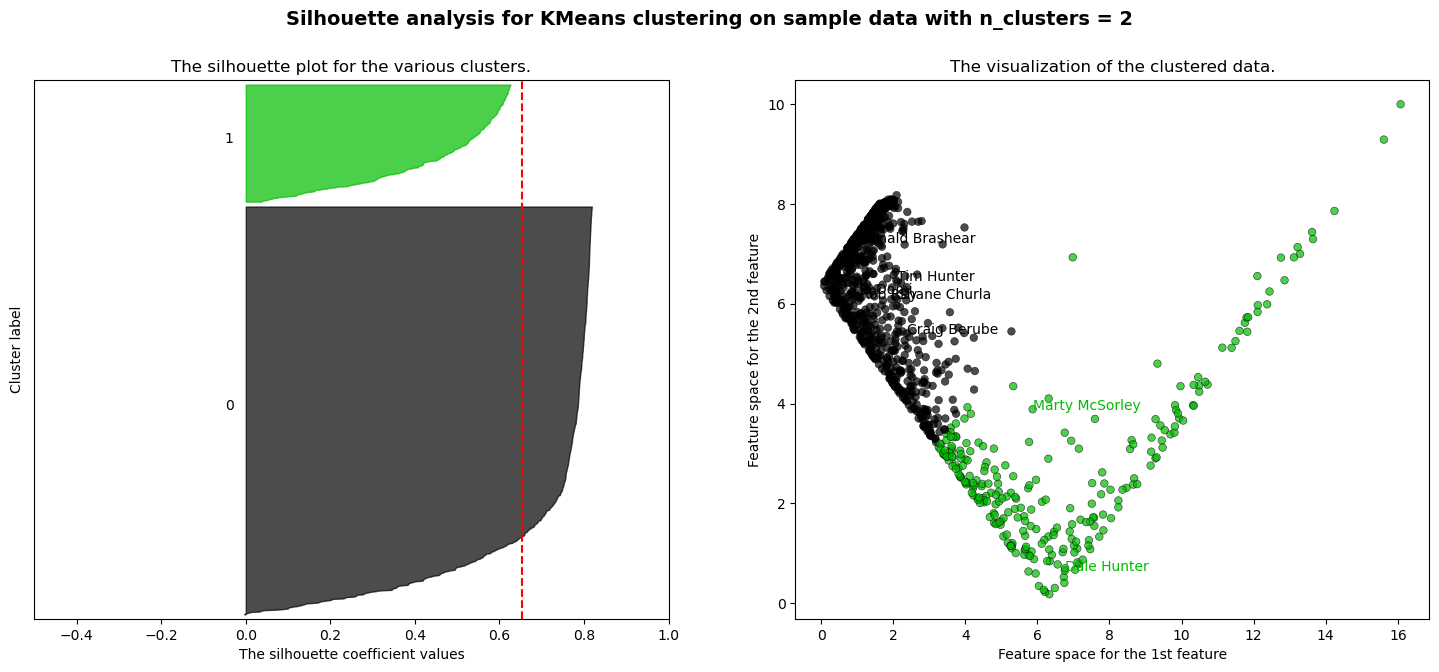

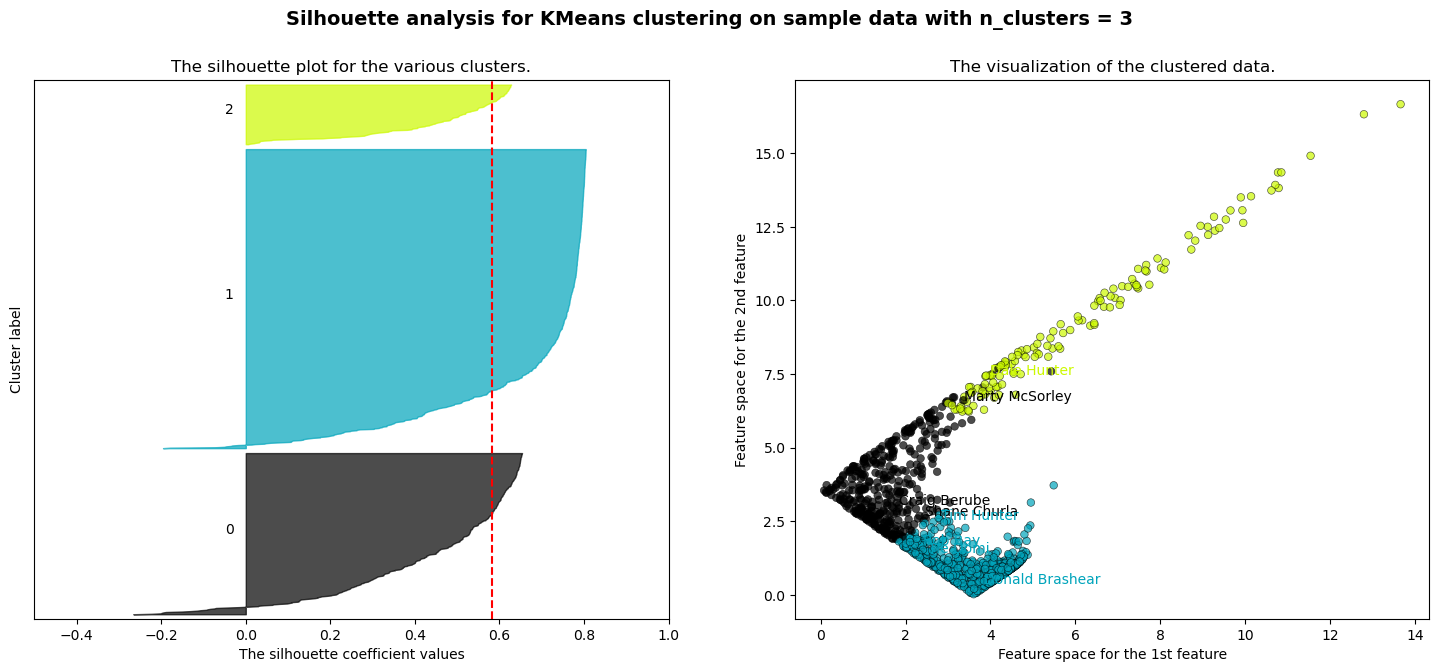

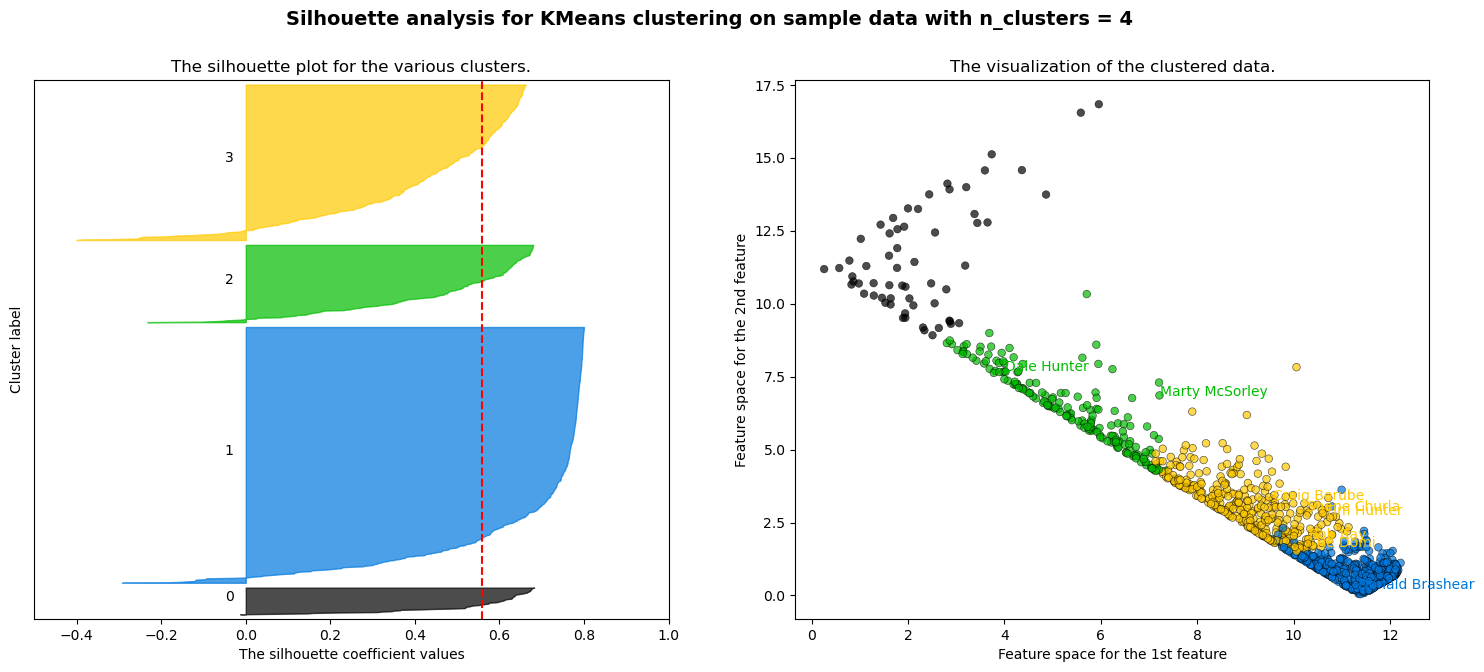

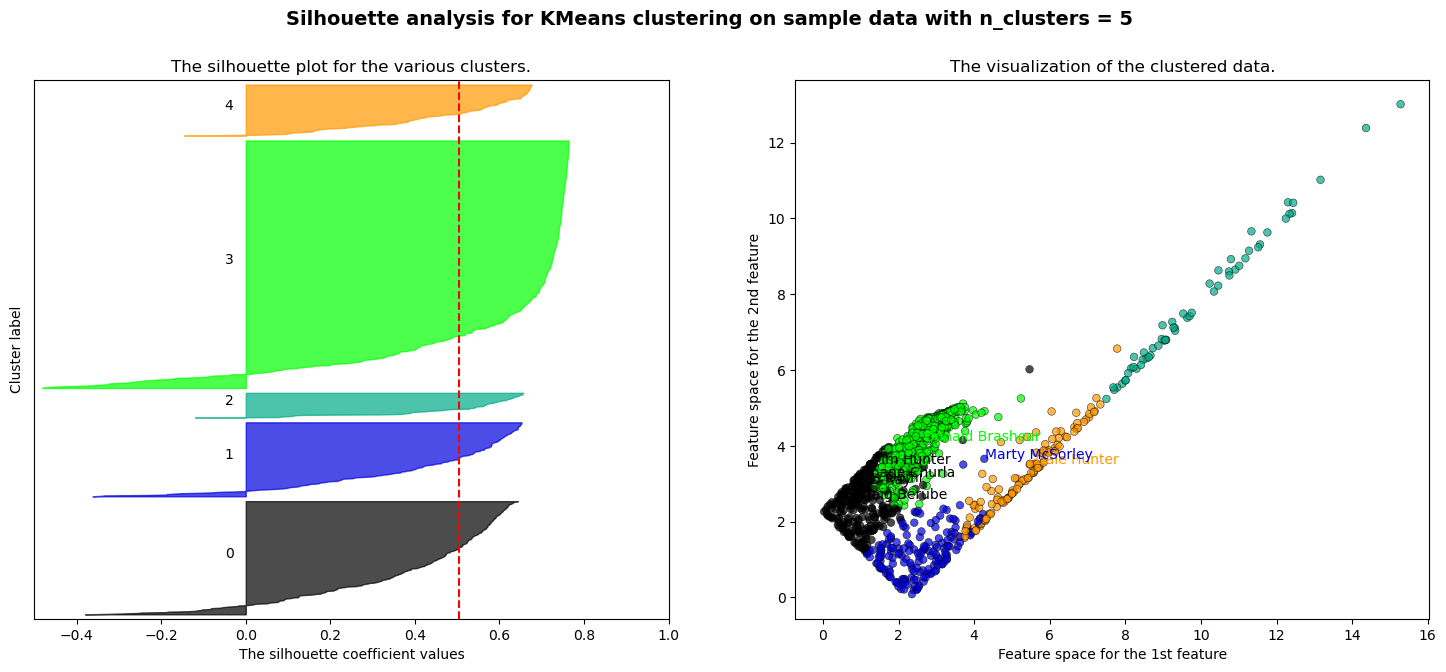

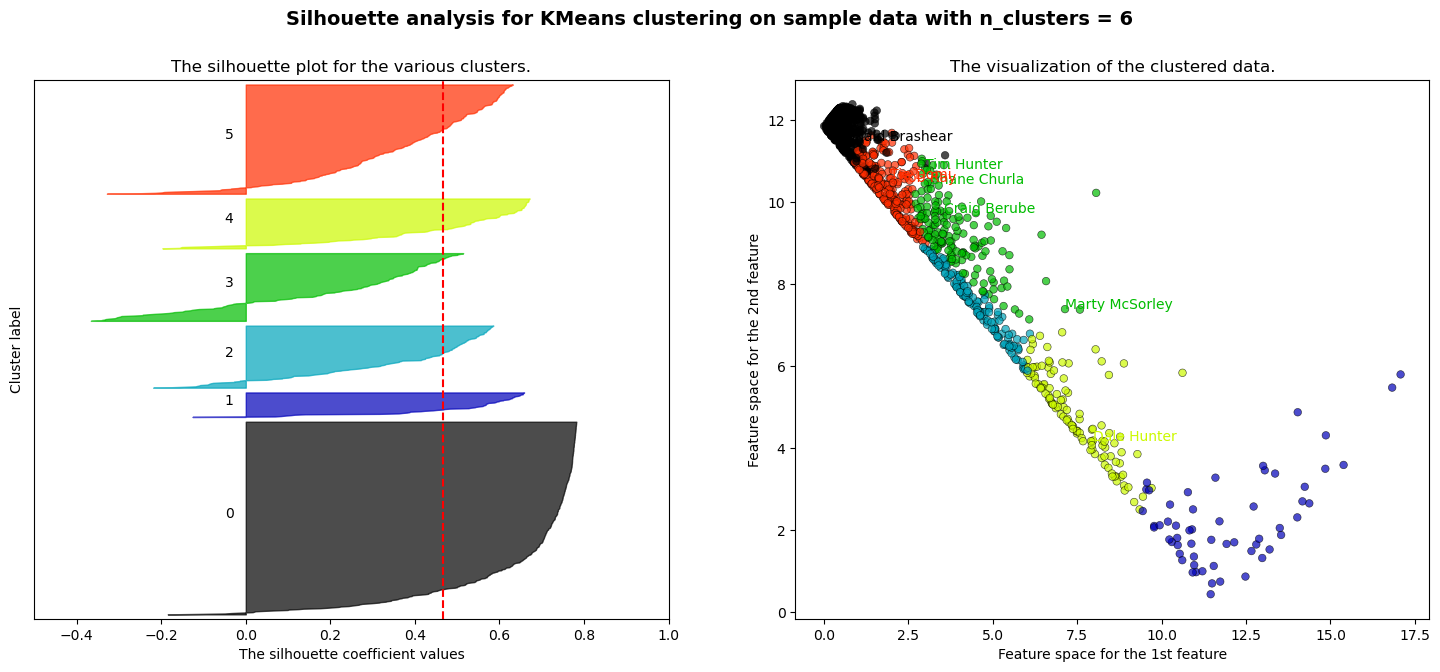

In [18]:
cluster_groups(X1, player1)

C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMe

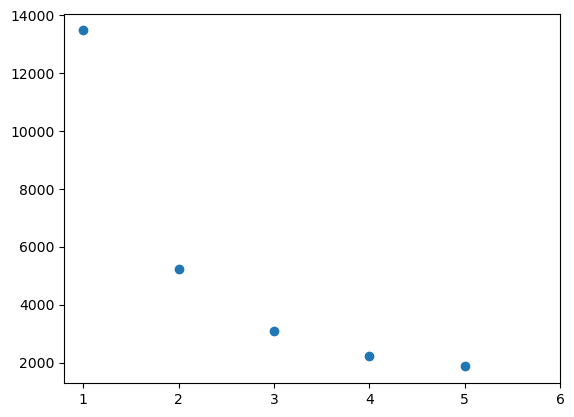

In [19]:
scree_plot(X1)

#### Group 2 clusters

C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.6366339763285693


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5620653062468214


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.5227159251517478


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.4762627687388334


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.45962128324692797


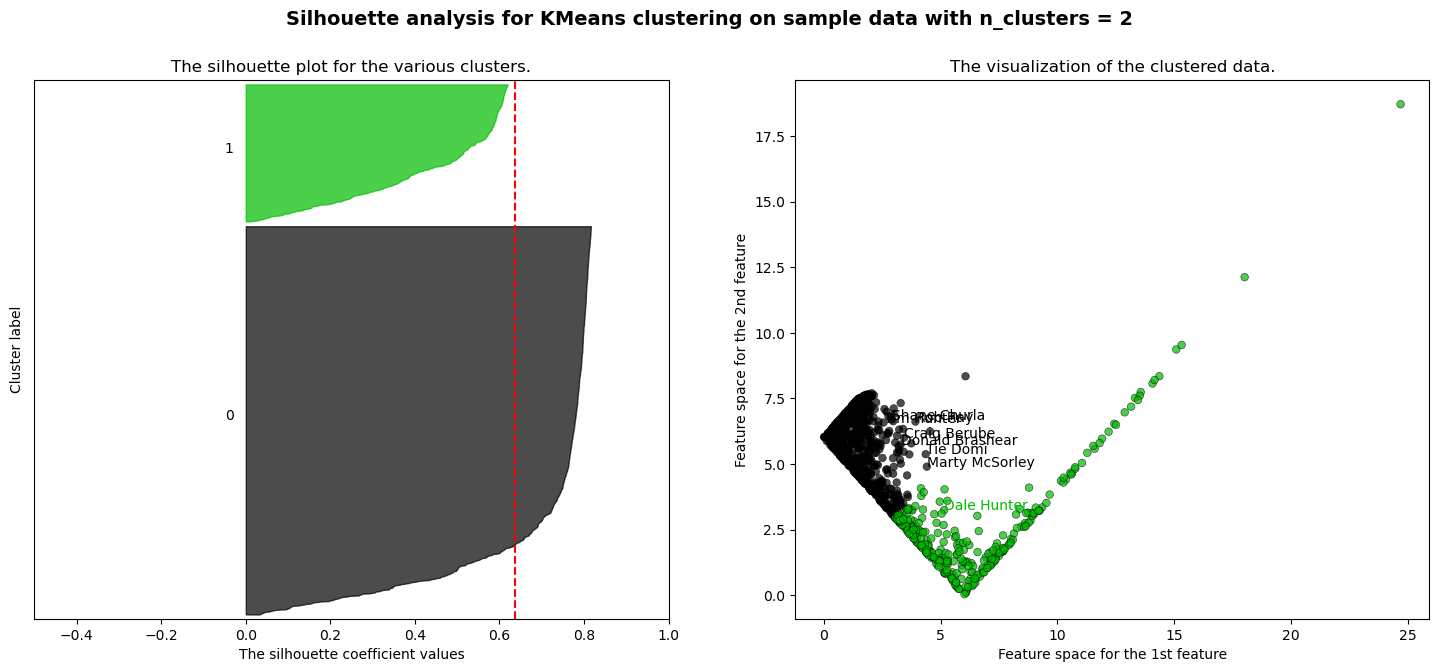

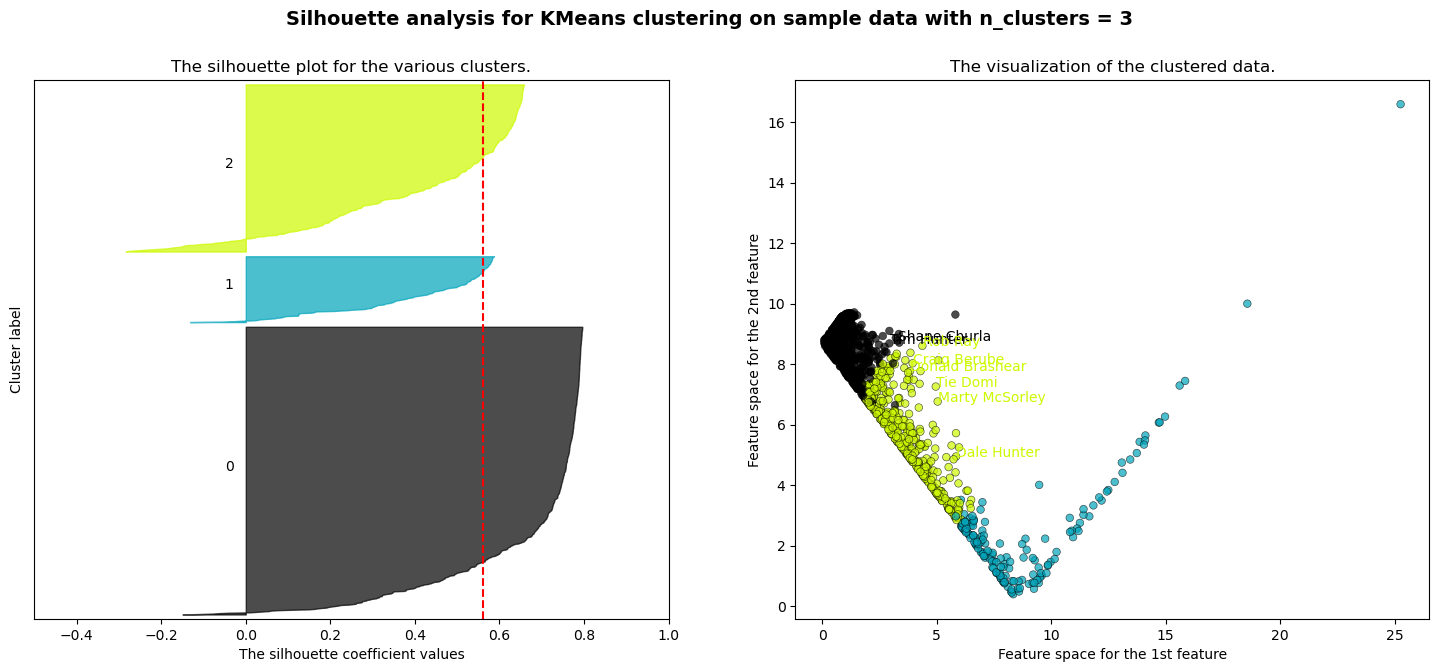

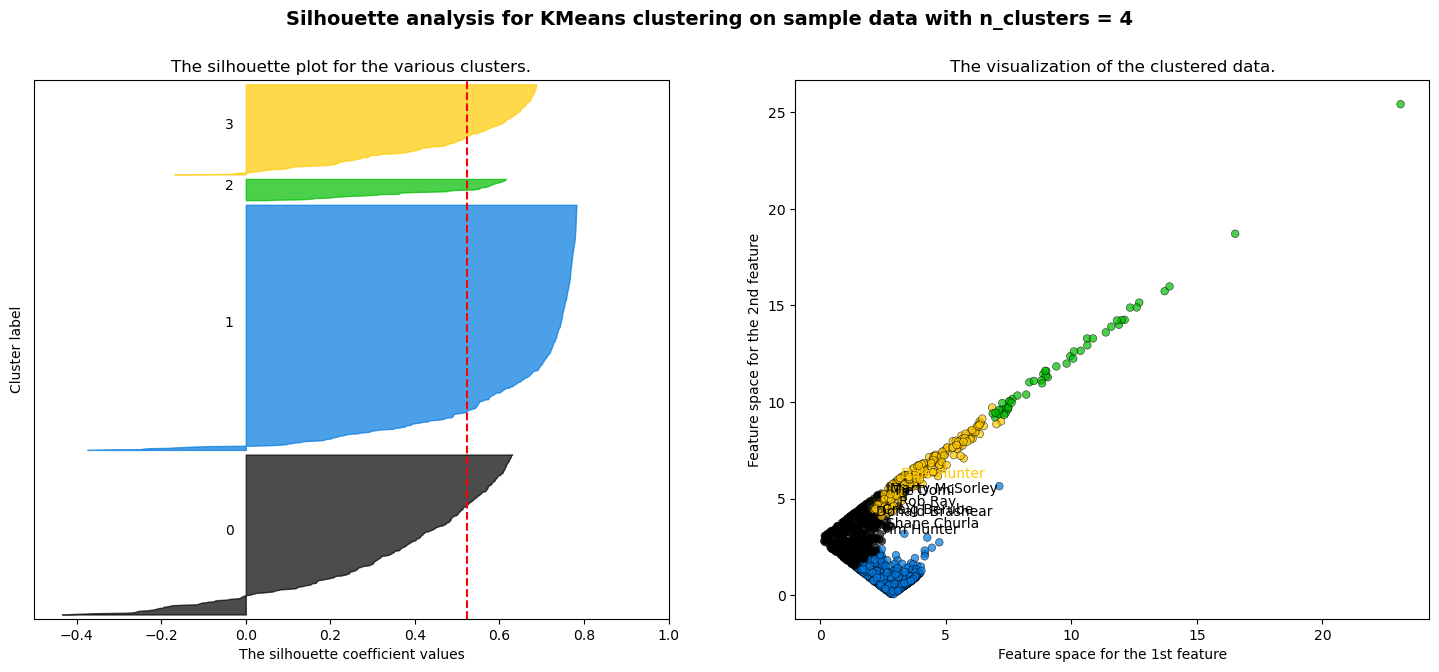

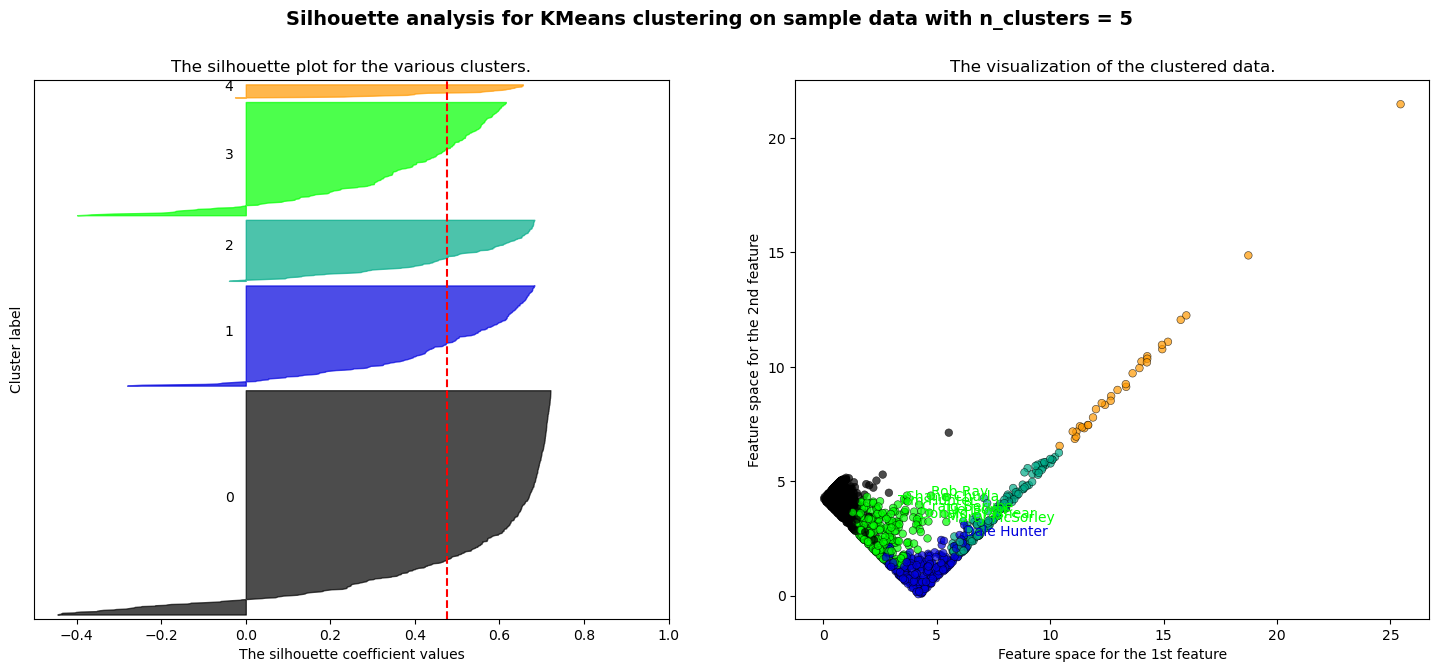

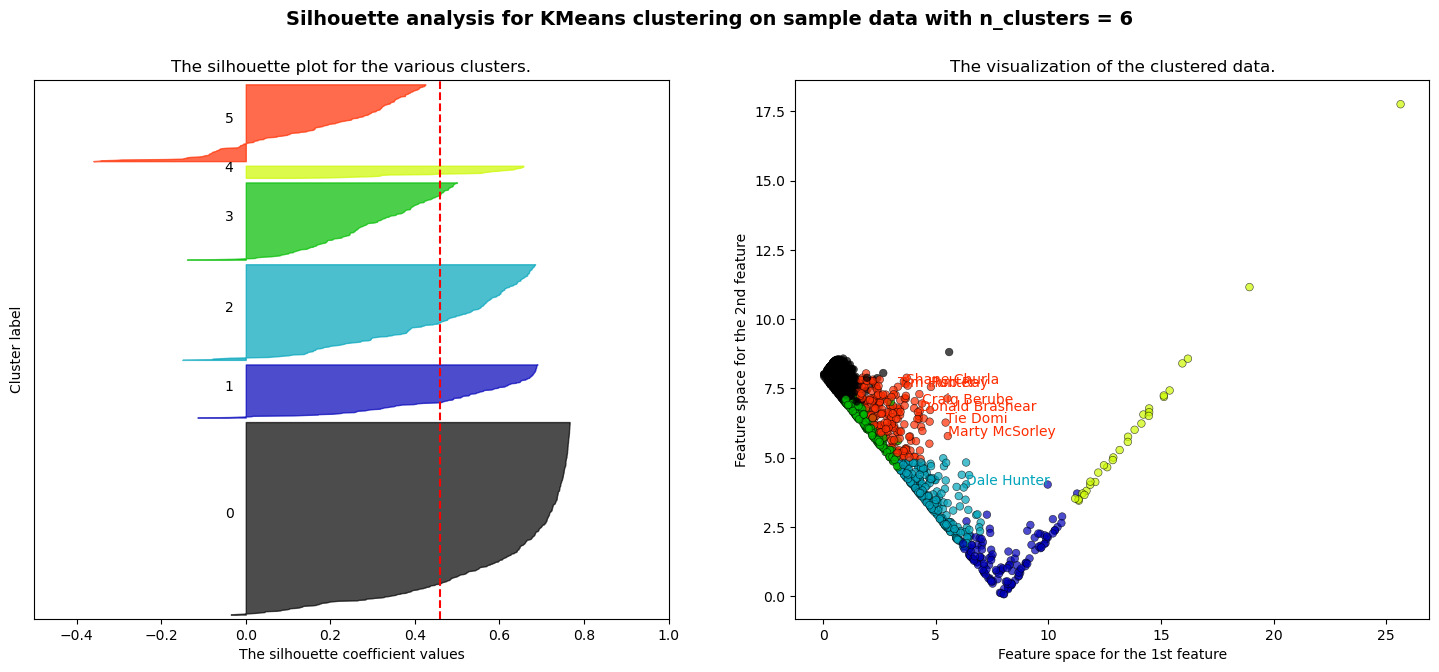

In [20]:
cluster_groups(X2, player2)

C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMe

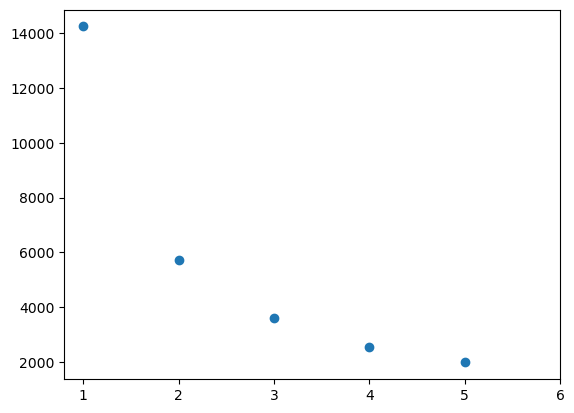

In [21]:
scree_plot(X2)

#### Group 3 clusters

C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.6517021966593174


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5728881934827832


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.5276889174347557


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.48979174250082674


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.45652528564325584


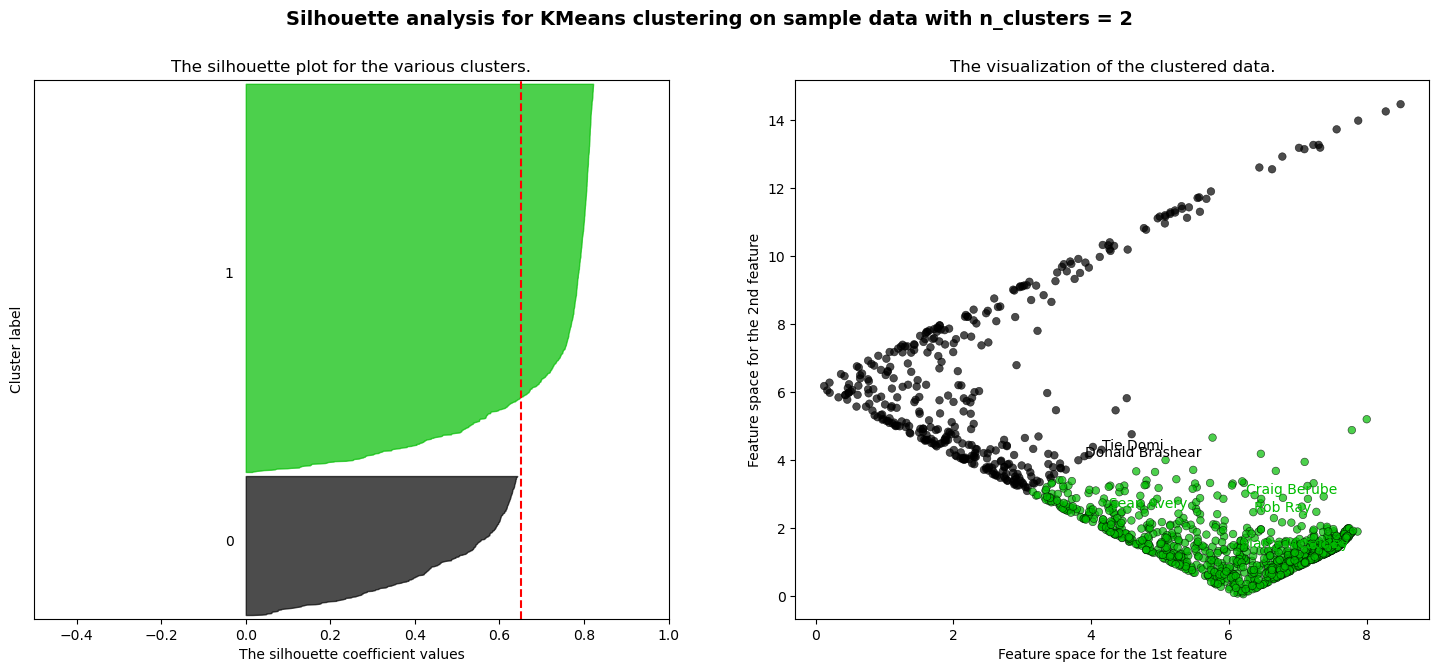

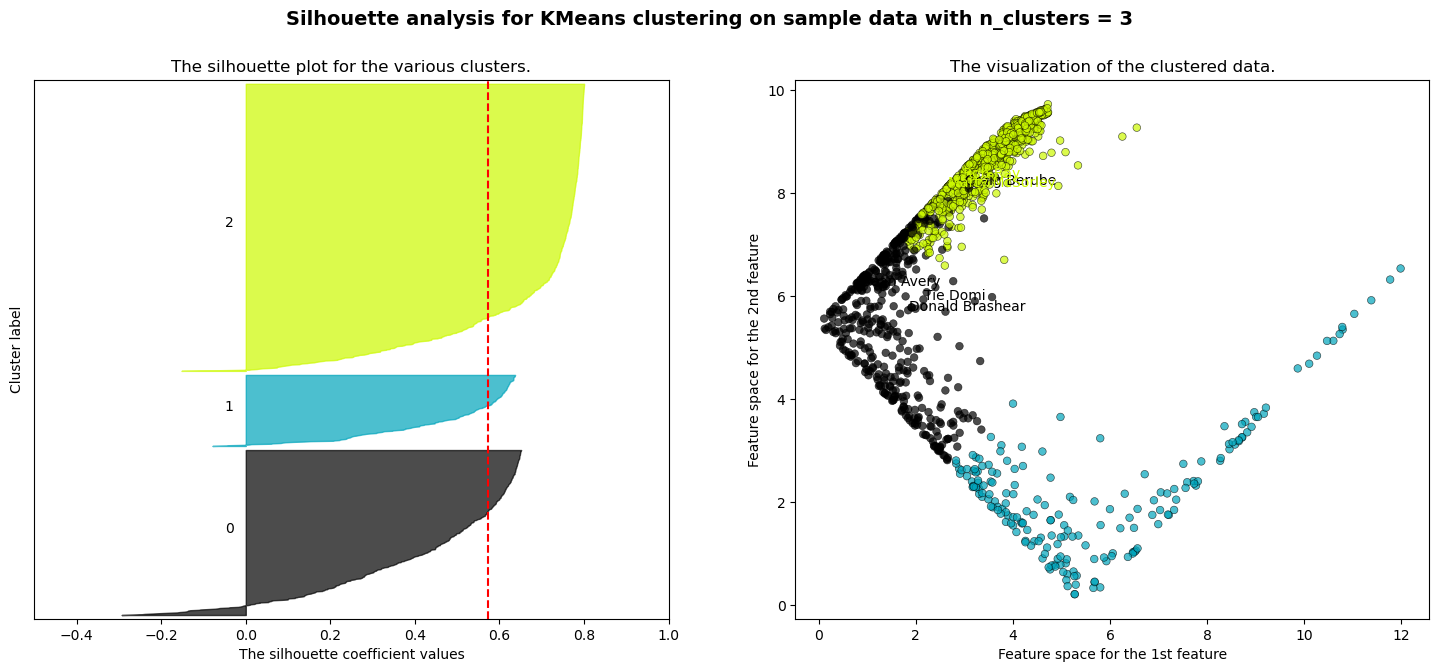

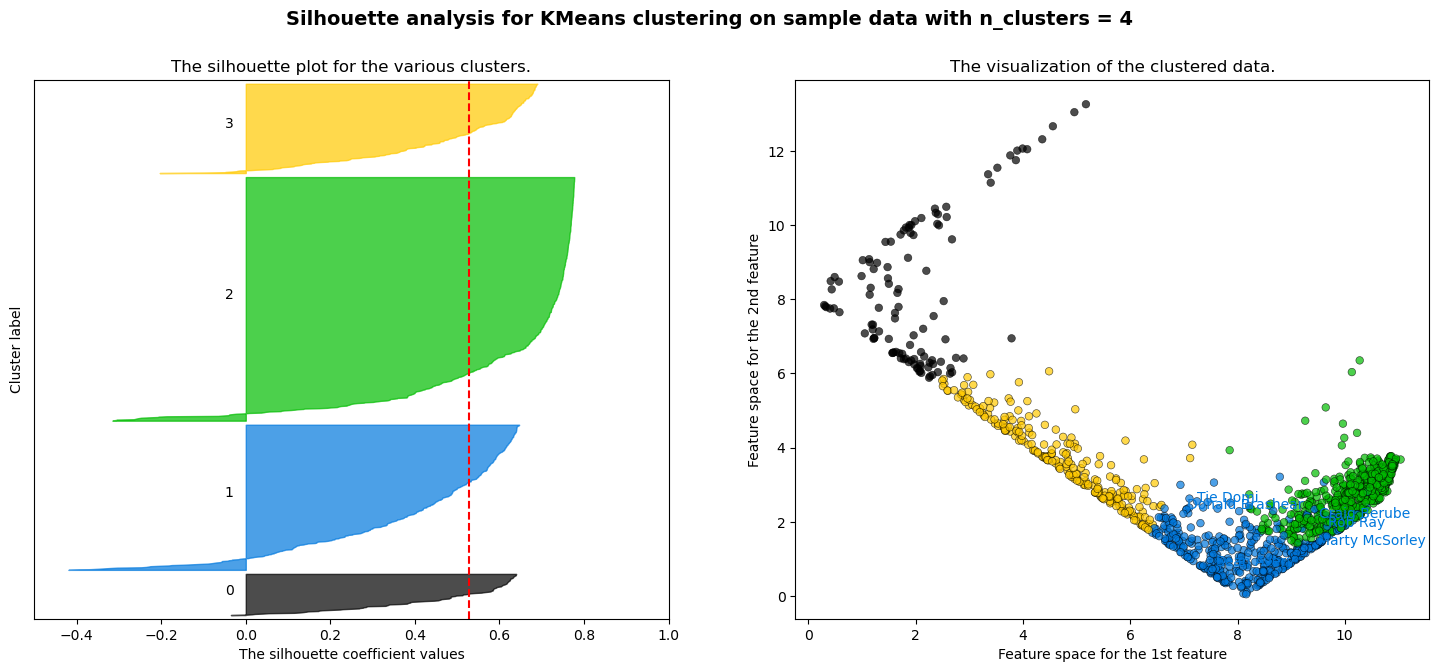

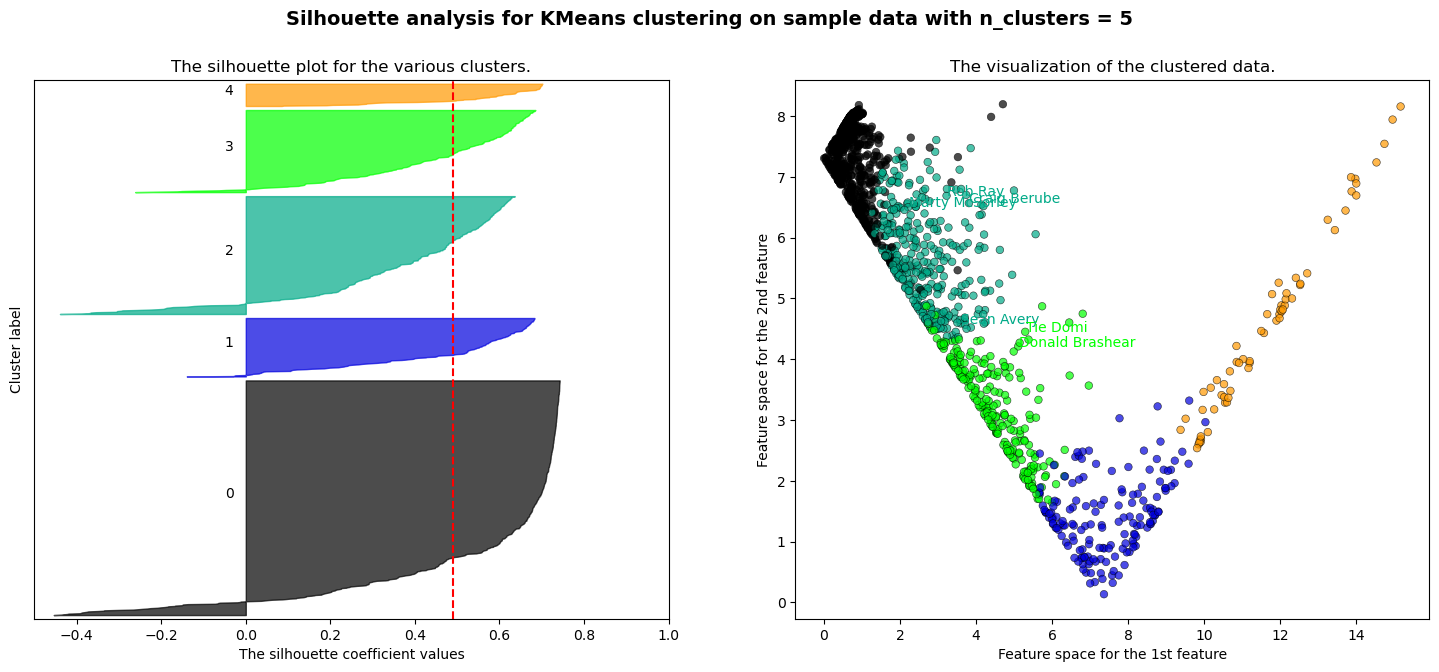

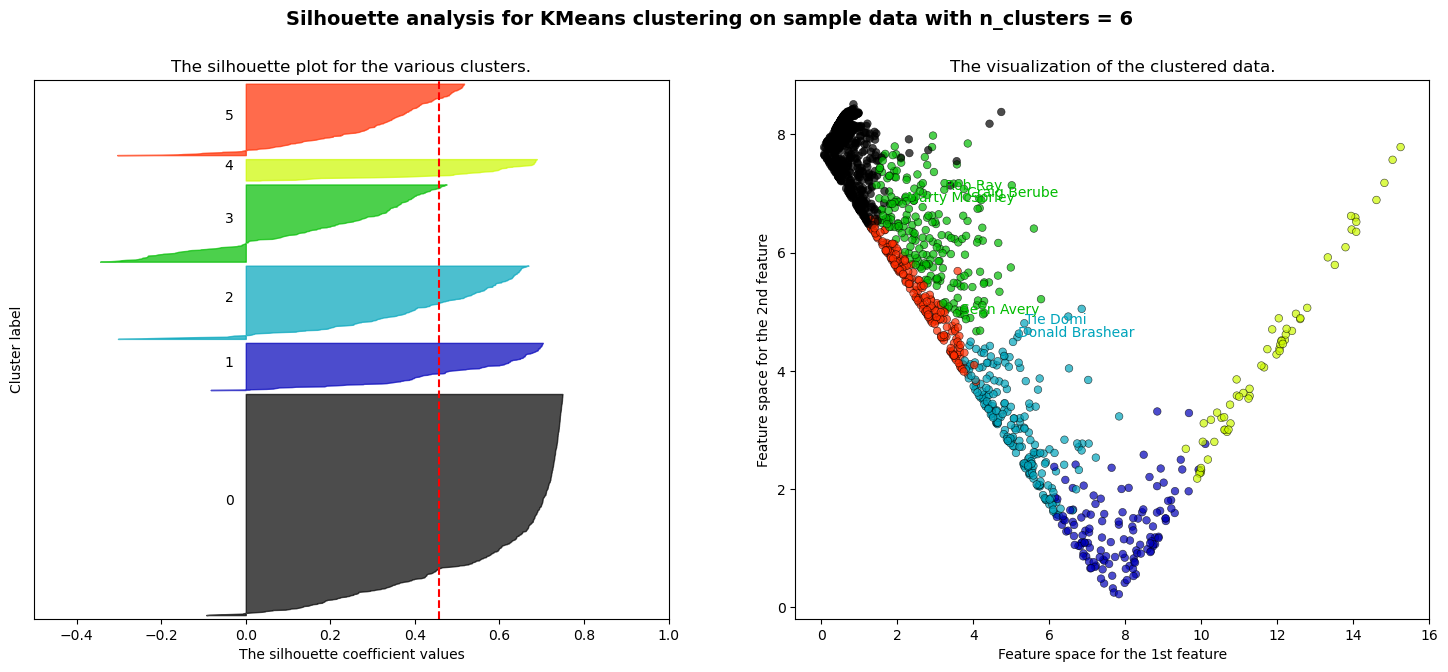

In [22]:
cluster_groups(X3, player3)

C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMe

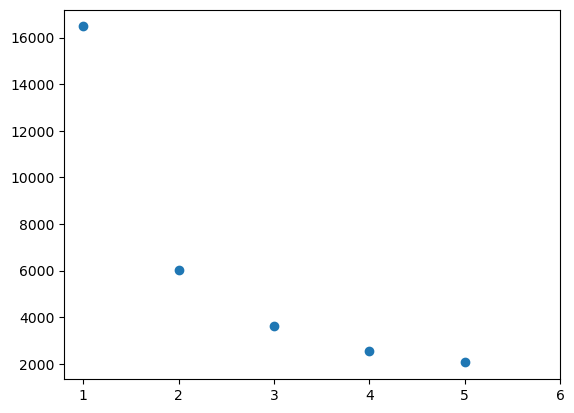

In [23]:
scree_plot(X3)

#### Group 4 clusters

C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.6317237398744506


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.557671514028976


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.5445629479966058


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.4992875885916314


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.4670568372139006


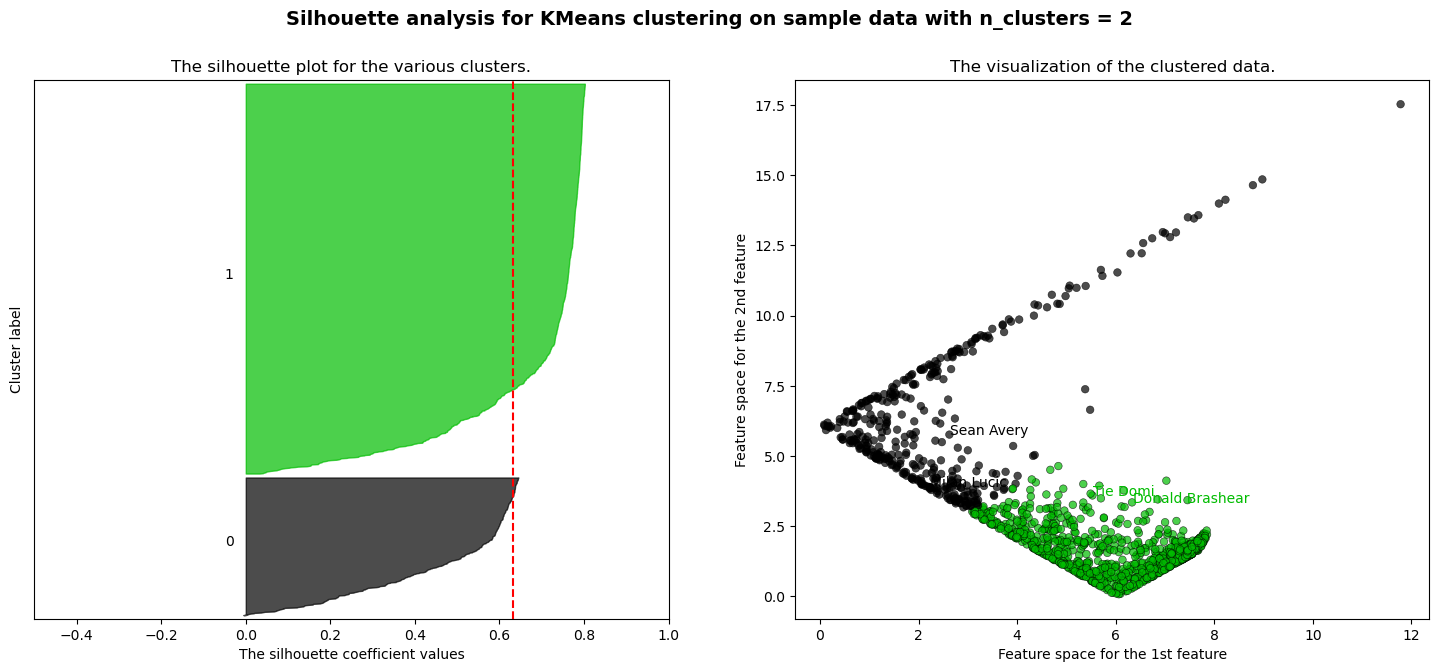

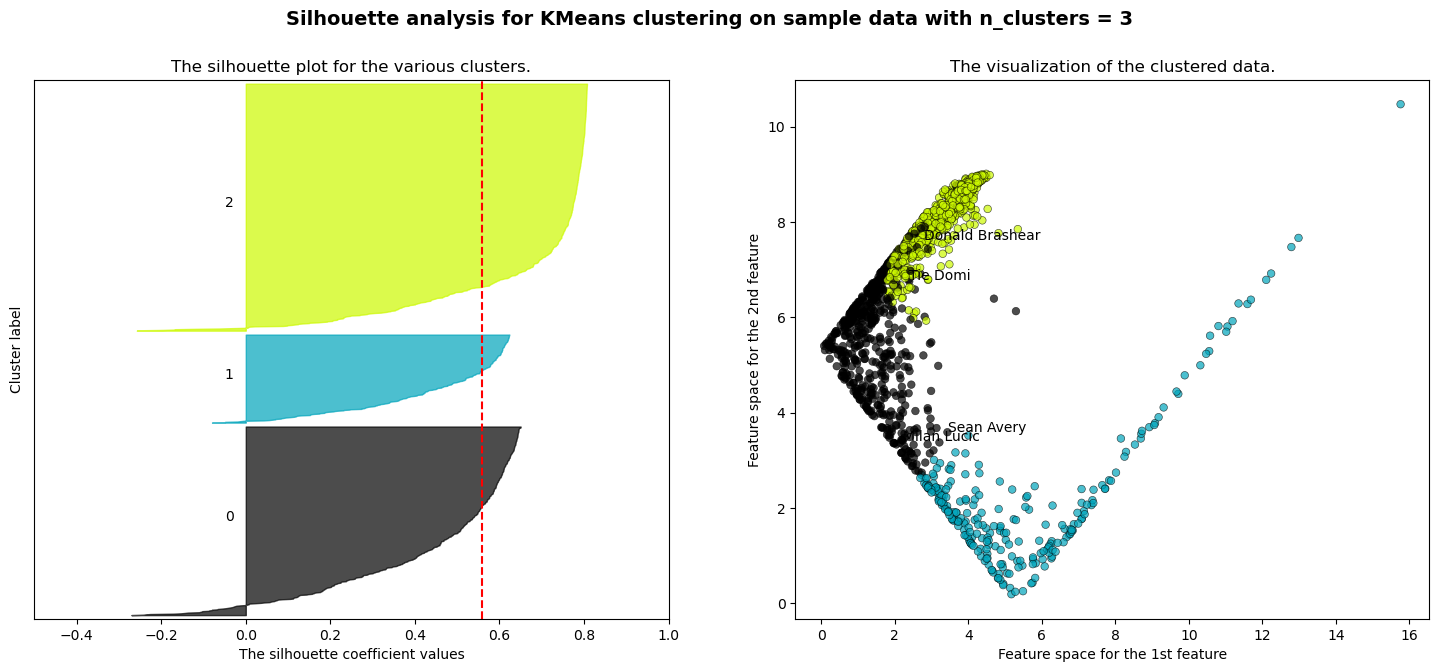

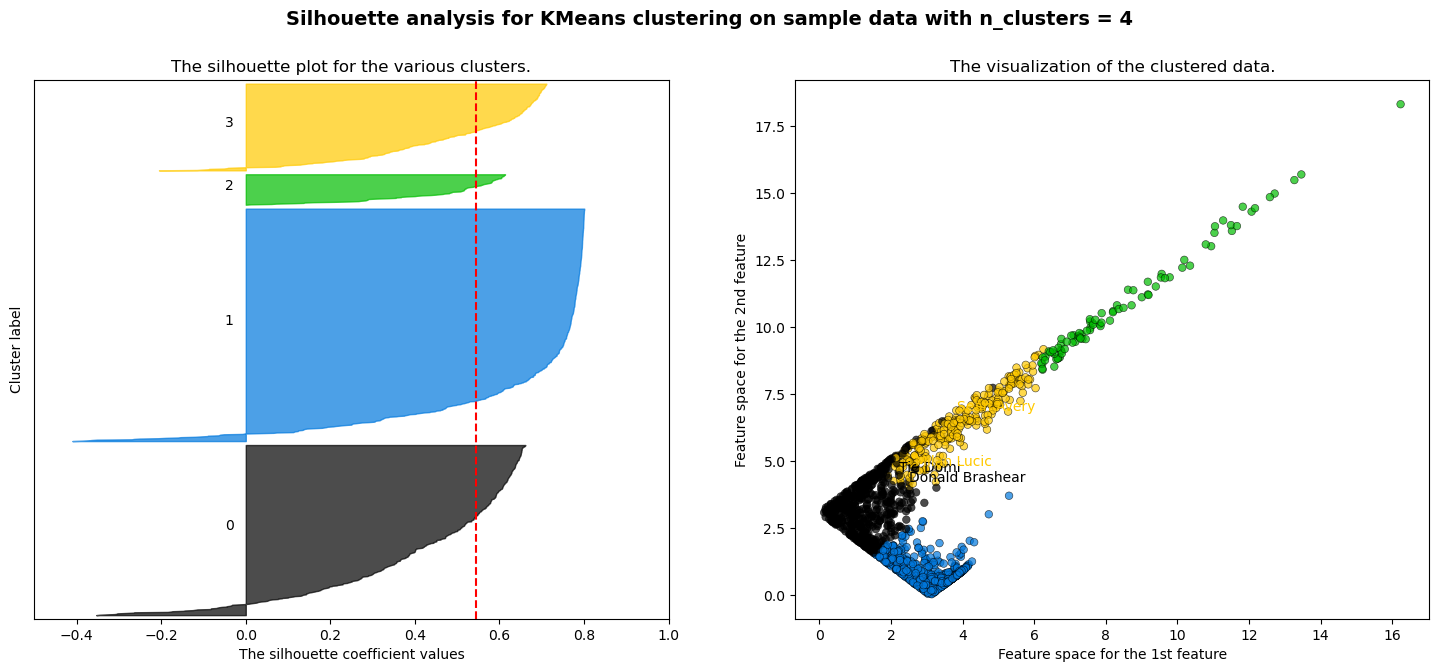

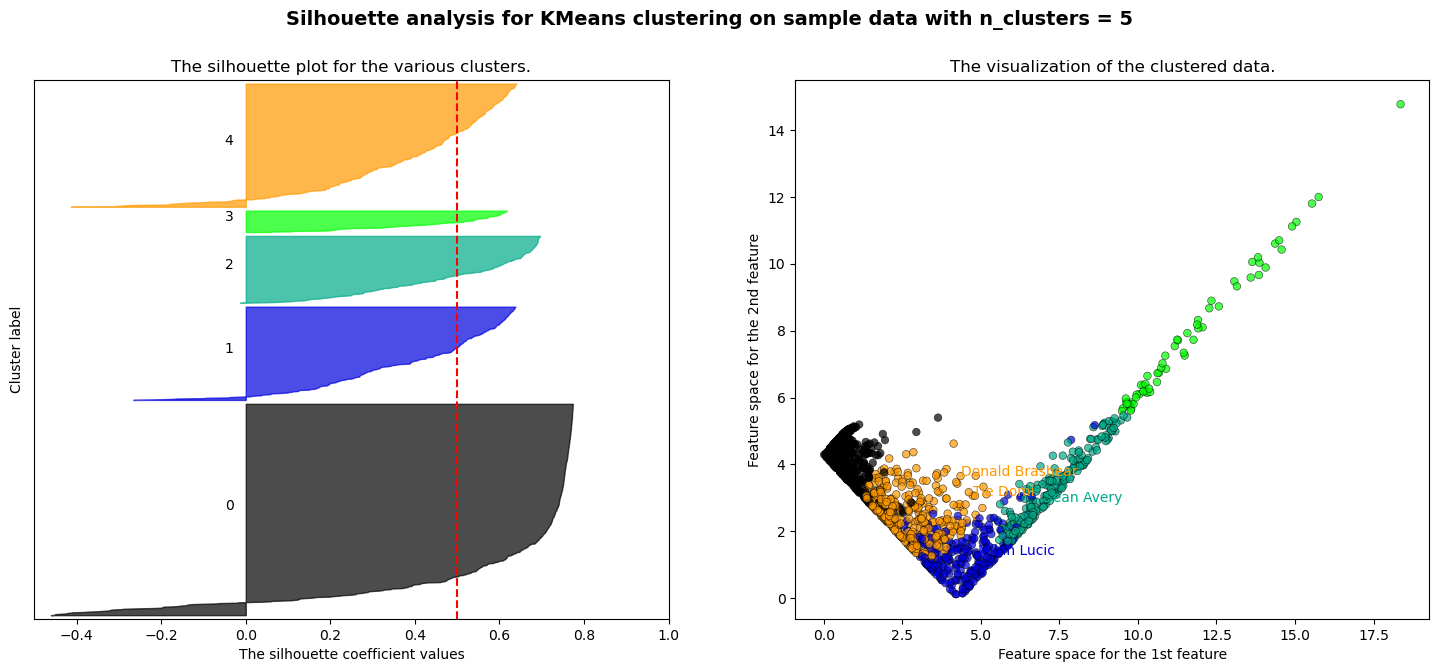

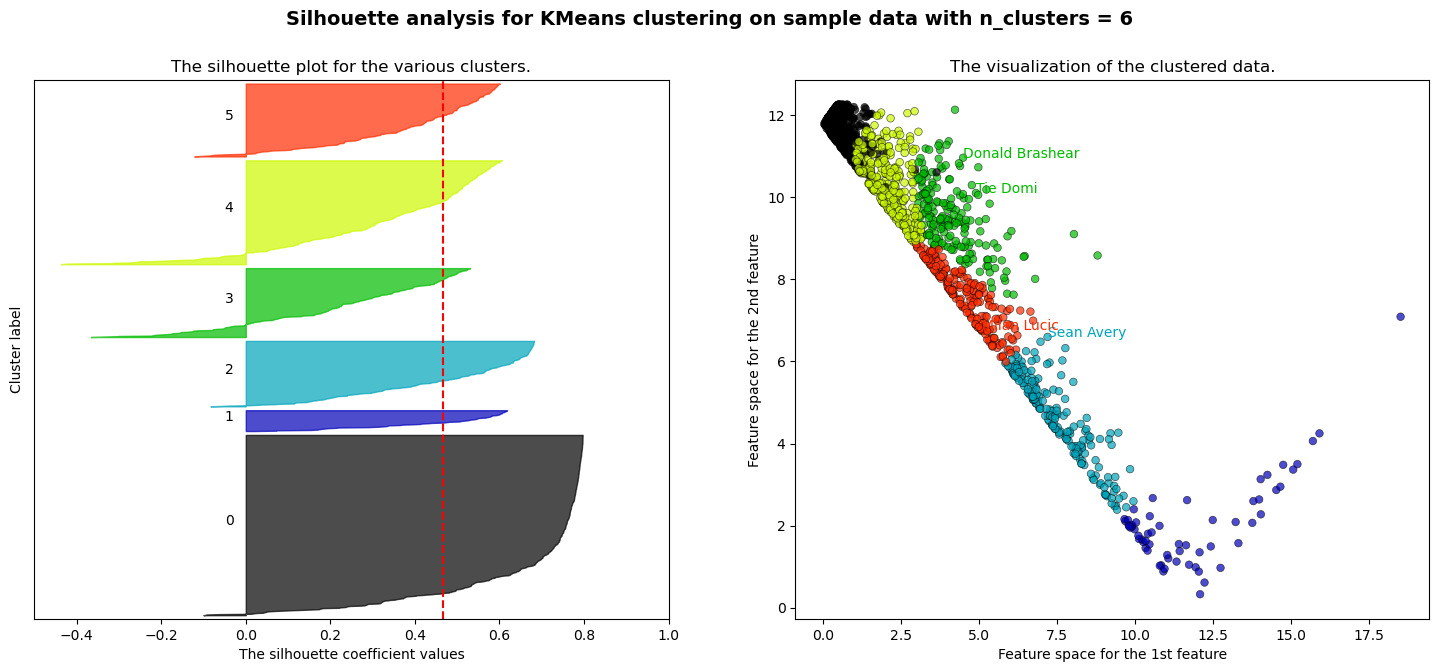

In [24]:
cluster_groups(X4, player4)

C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMe

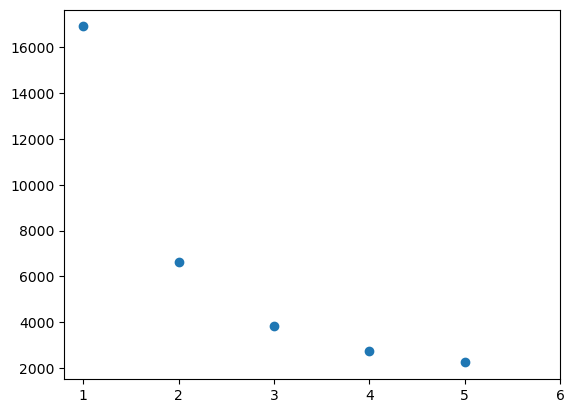

In [25]:
scree_plot(X4)

#### Group 5 clusters

C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.6375559694933066


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5648031271253282


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.5163432224459332


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.4831914070134211


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.46666360316101


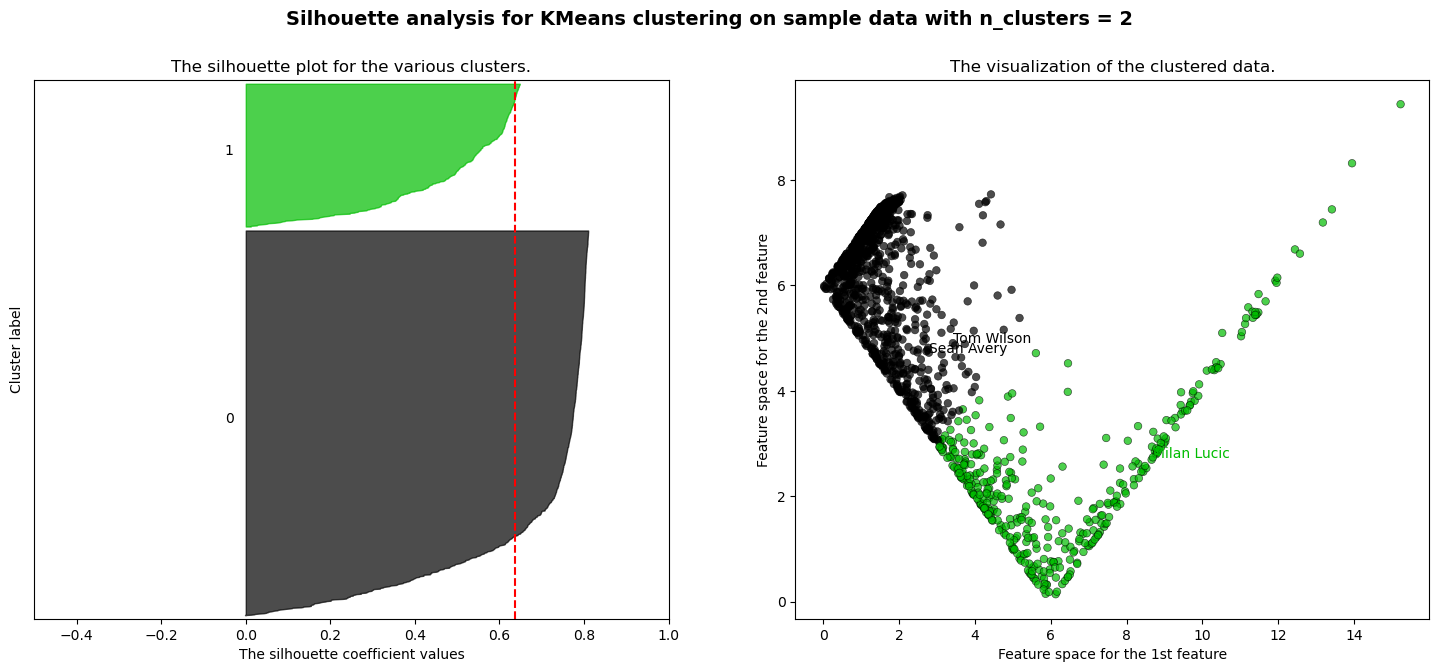

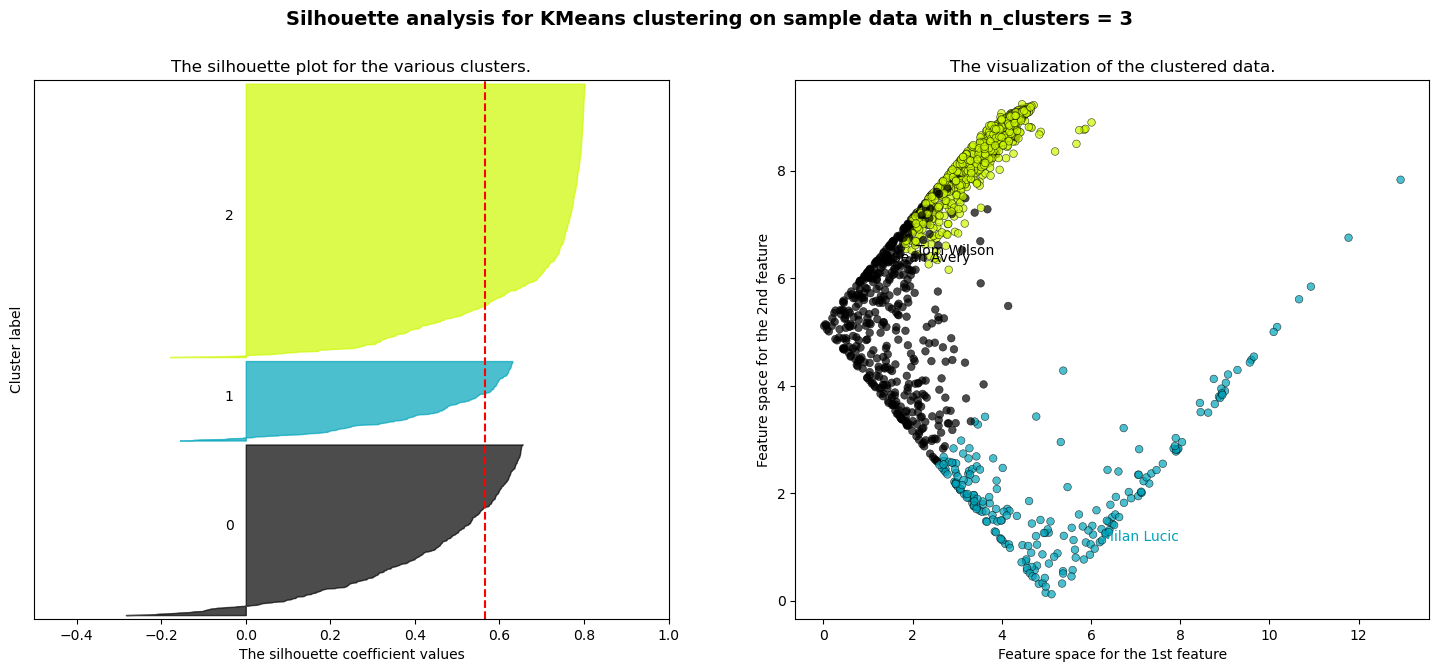

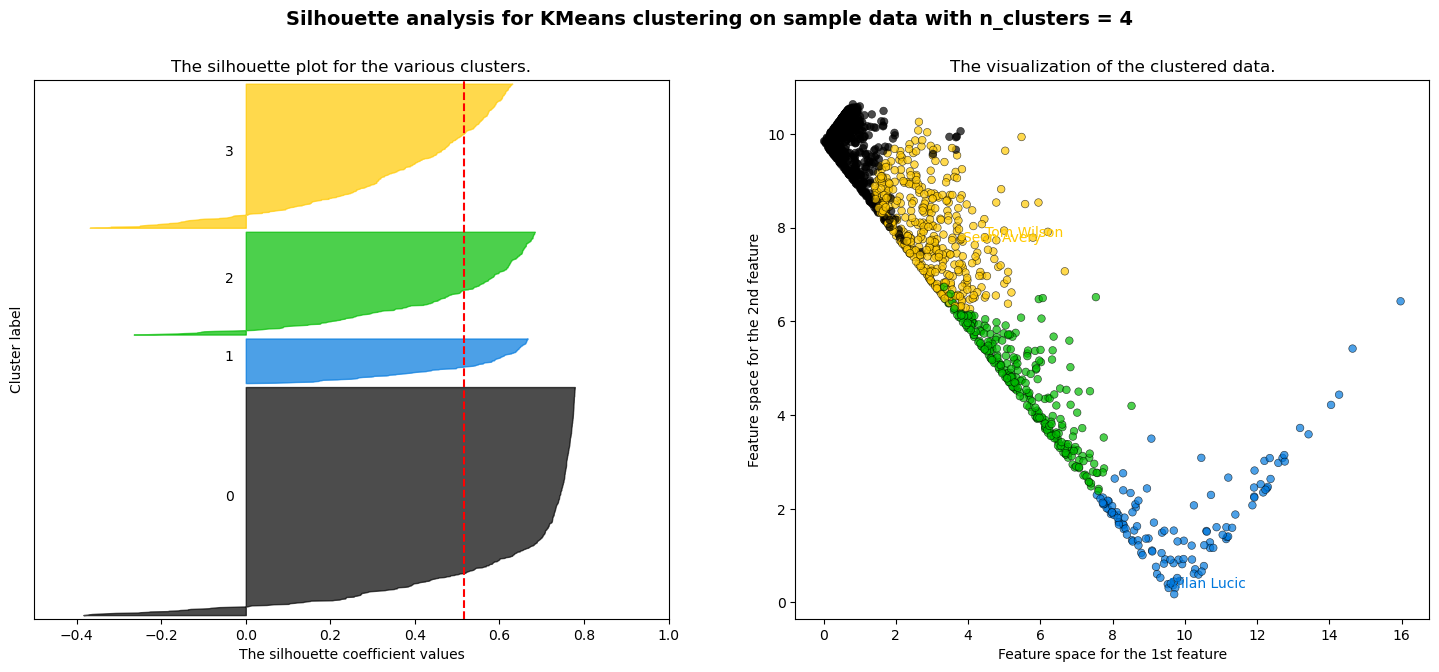

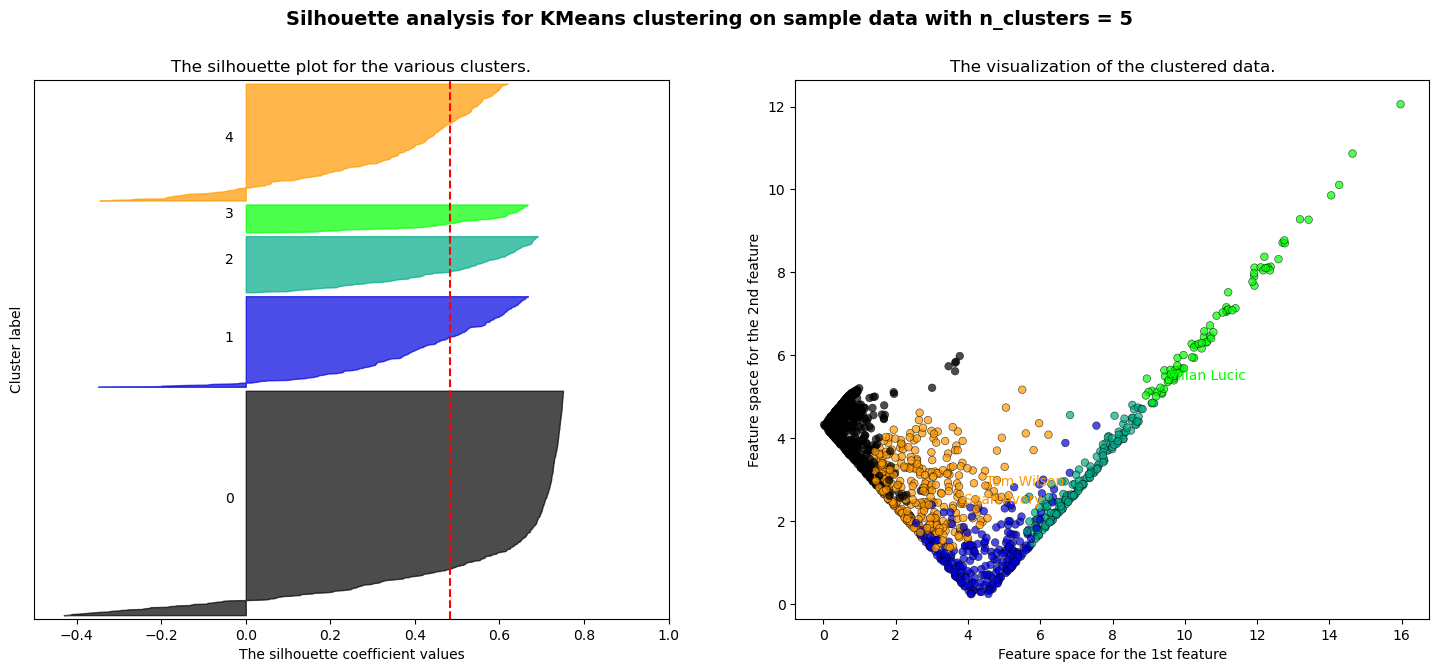

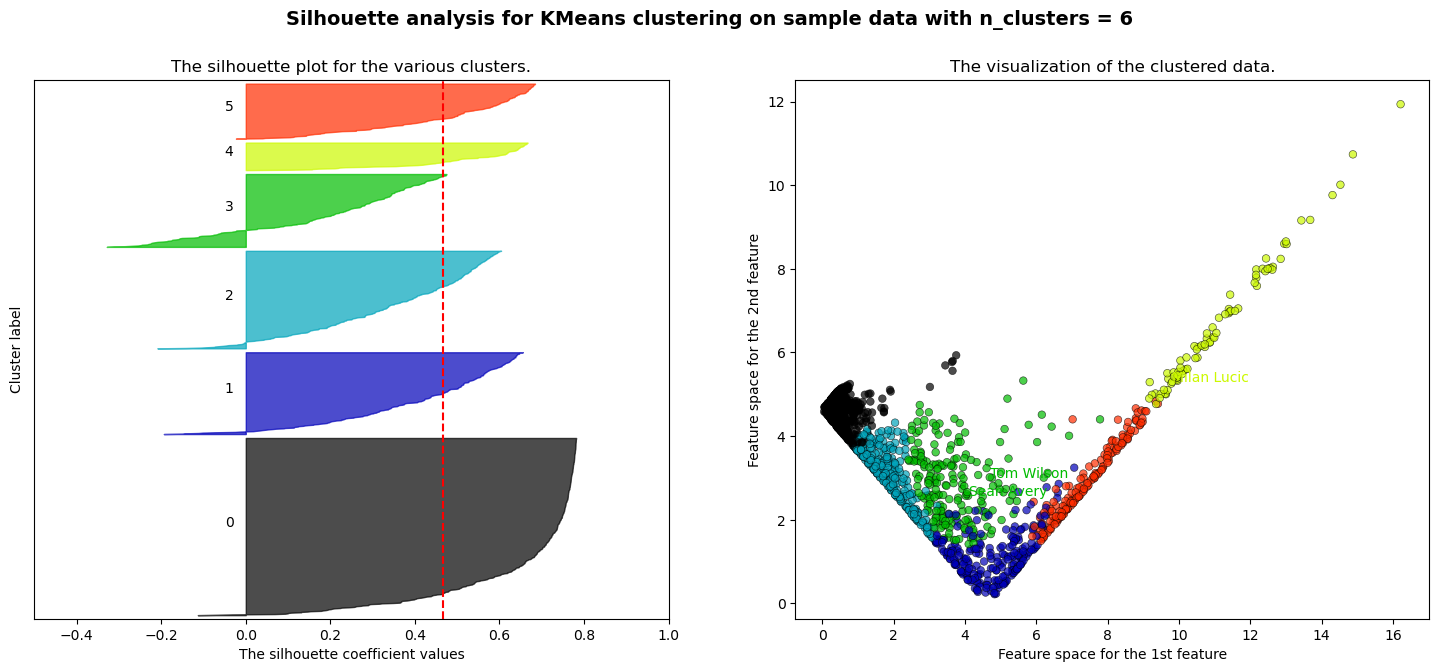

In [26]:
cluster_groups(X5, player5)

C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMe

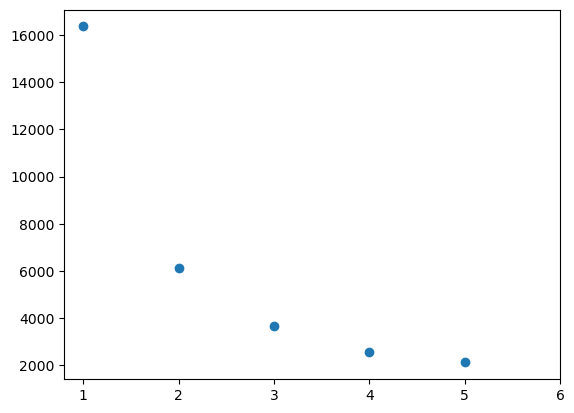

In [27]:
scree_plot(X5)

#### Group 6 clusters

C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.6338406784855586


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5805376857545457


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.532538803373099


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.48641927088477044


C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.47901240964926267


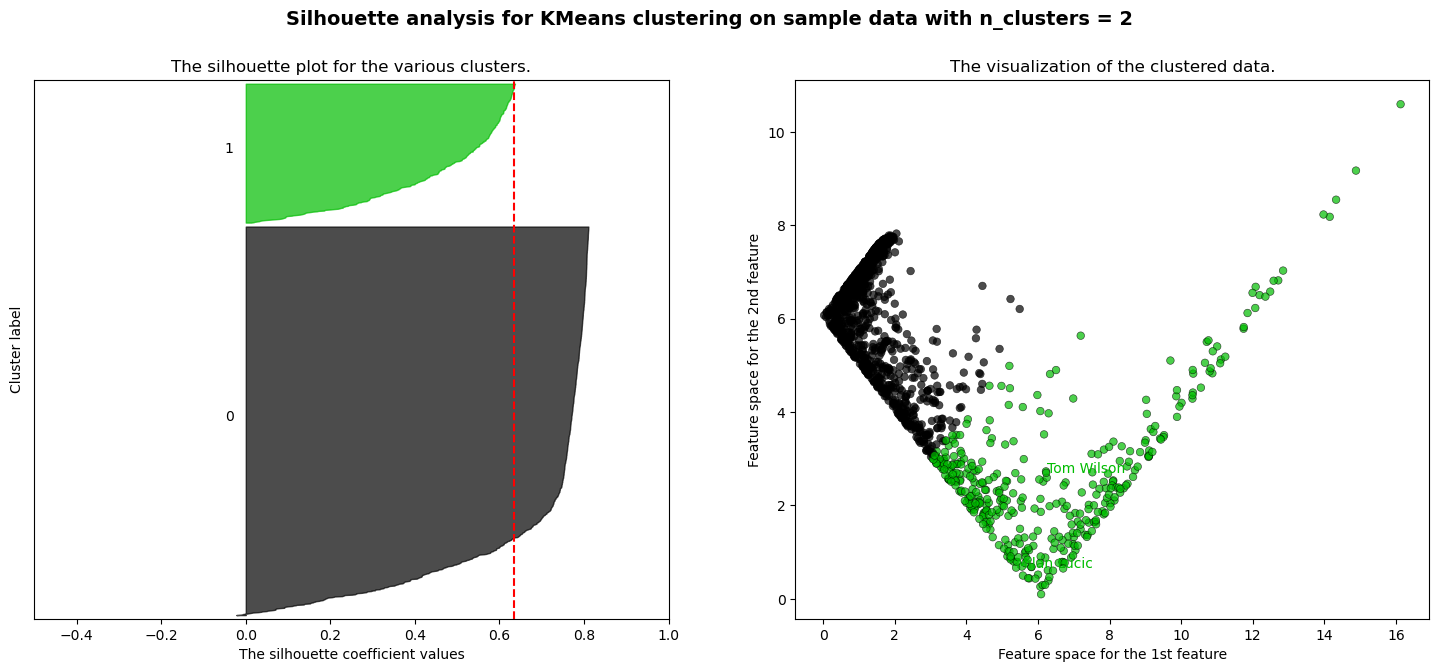

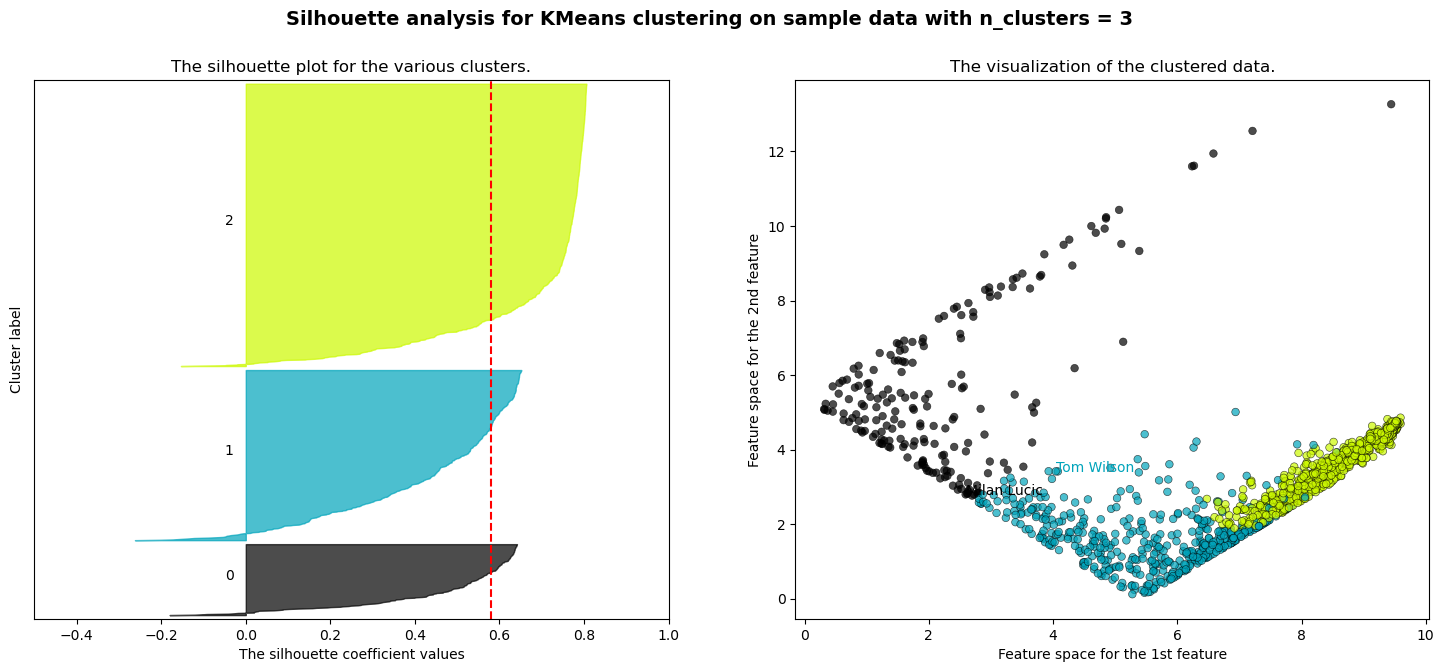

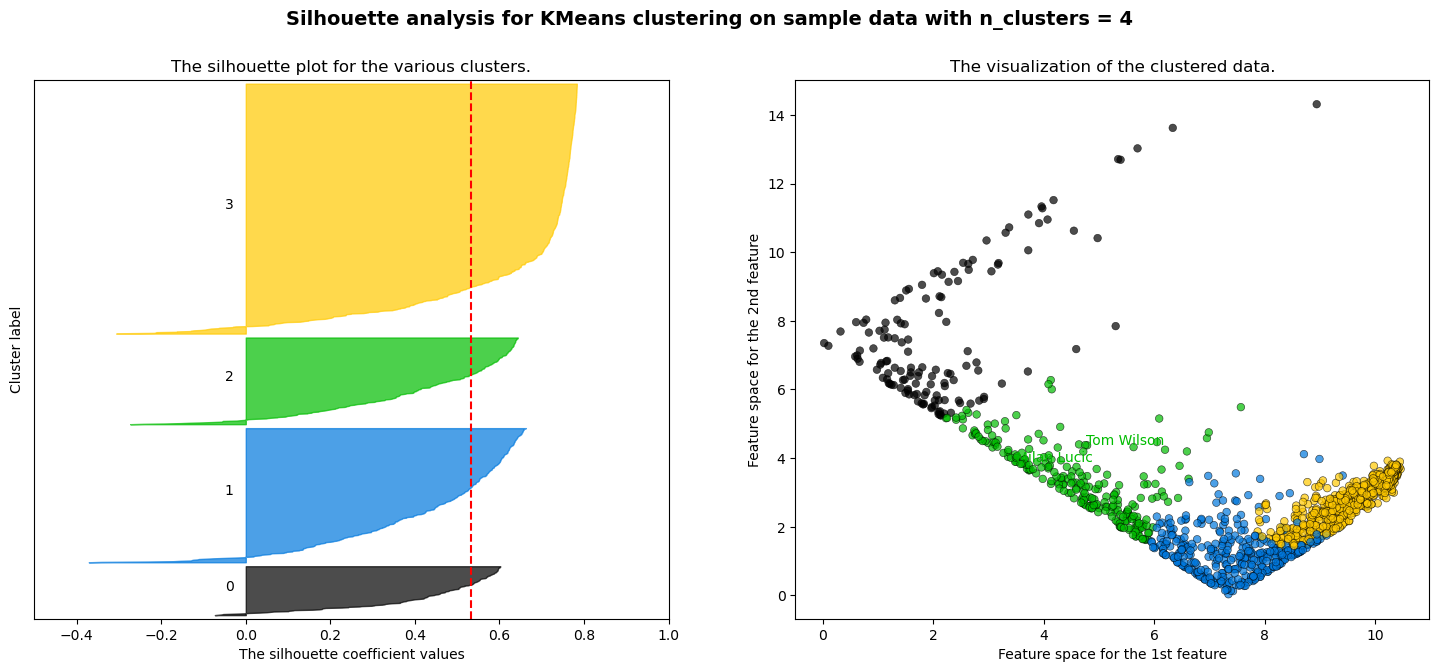

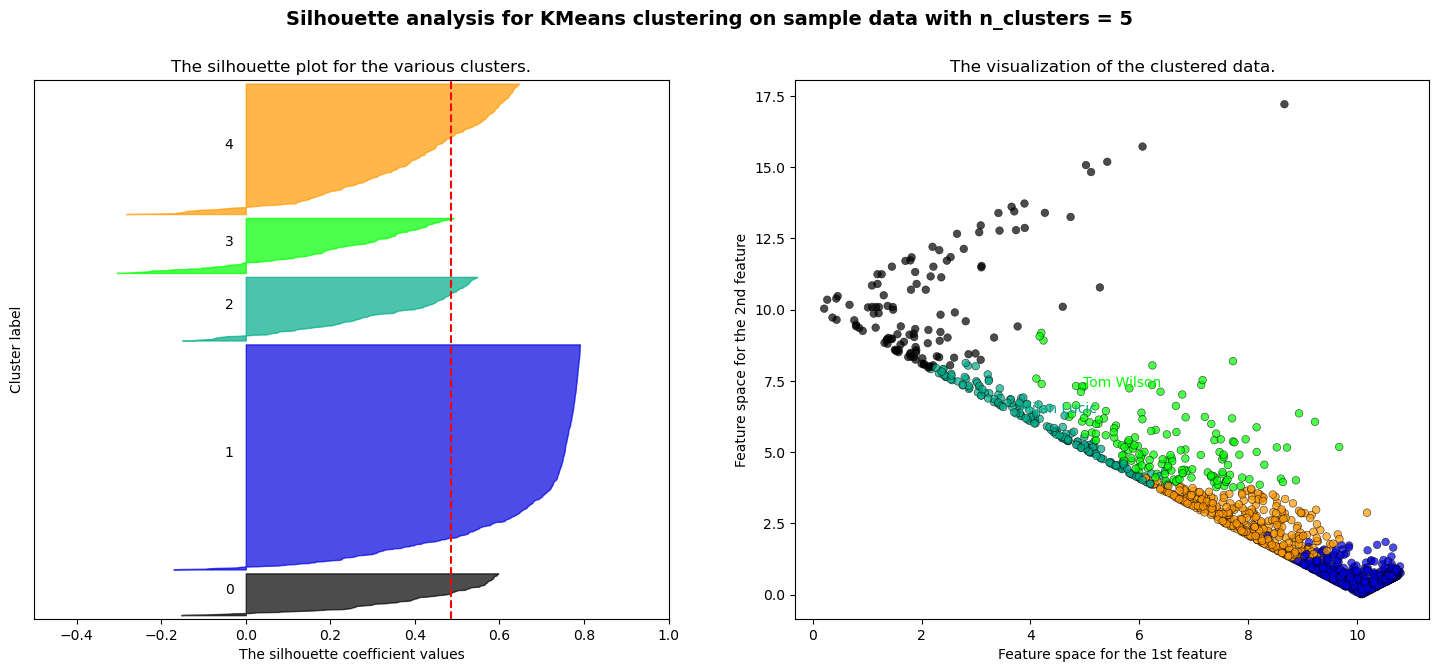

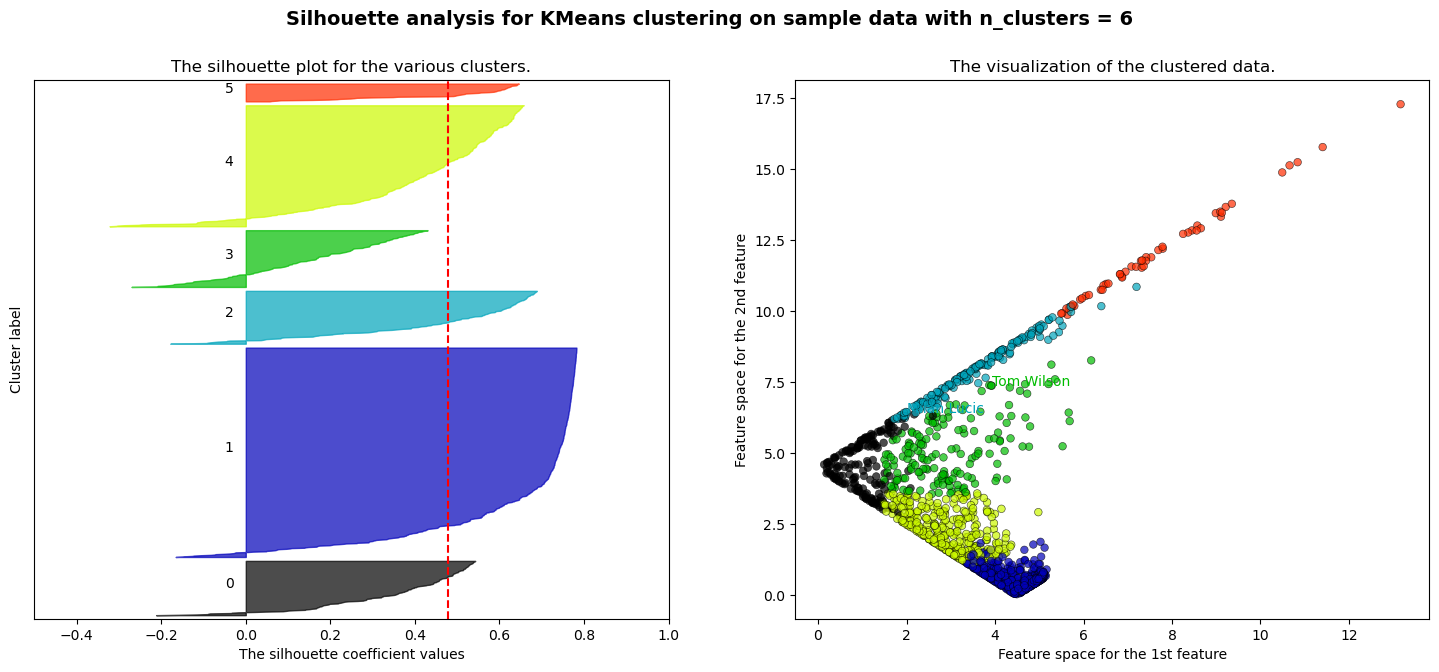

In [28]:
cluster_groups(X6, player6)

C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\micha\anaconda3\envs\si671\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMe

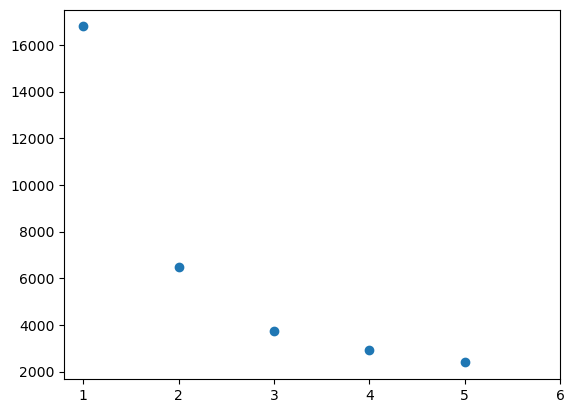

In [29]:
scree_plot(X6)

### Next Section

In [30]:
group1

Id   Rk          Player   Age   Tm Pos     GP          G  \
0     actonke01    1     Keith Acton  33.0  TOT   C  71.00   8.800000   
1     adamsgr01    3      Greg Adams  29.0  TOT  LW  35.00   4.000000   
2     adamsgr02    2      Greg Adams  28.0  VAN  LW  63.40  23.800000   
3     agnewji01    4       Jim Agnew  24.5  HAR   D  16.75   0.000000   
4     aholape01    4     Peter Ahola  24.0  CGY   D  41.00   3.333333   
...         ...  ...             ...   ...  ...  ..    ...        ...   
1159  zhitnal01  711  Alexei Zhitnik  20.5  LAK   D  79.50  12.000000   
1160  zholtse01  712  Sergei Zholtok  20.5  BOS  LW  12.50   1.000000   
1161  zmoledo01  713     Doug Zmolek  22.5  TOT   D  79.50   3.000000   
1162  zombori01  655      Rick Zombo  28.0  STL   D  73.20   2.800000   
1163  zubovse01  715   Sergei Zubov*  22.5  NYR   D  63.50  10.000000   

              A   PTS  ...    PS         EV   PP   SH   GW       EV.1  \
0     13.800000  22.6  ...  0.40   7.800000  0.4  0.6  0.8  12.200000   
1     10.000000  14.0  ...  0.40   4.000000  0.0  0.0  0.0   9.000000   
2     25.200000  49.0  ...  4.24  14.600000  8.4  0.8  2.6  16.600000   
3      0.000000   0.0  ...  0.35   0.000000  0.0  0.0  0.0   0.000000   
4      5.666667   9.0  ...  2.00   3.333333  0.0  0.0  0.0   5.333333   
...         ...   ...  ...   ...        ...  ...  ...  ...        ...   
1159  38.000000  50.0  ...  5.75   4.000000  8.0  0.0  1.5  22.000000   
1160   1.000000   2.0  ... -0.15   0.500000  0.5  0.0  0.0   1.000000   
1161   7.000000  10.0  ...  1.80   2.000000  1.0  0.0  0.0   5.500000   
1162  15.400000  18.2  ...  3.50   2.800000  0.0  0.0  0.0  12.800000   
1163  50.000000  60.0  ...  8.30   4.000000  6.0  0.0  0.5  25.000000   

           PP.1  SH.1           S         S%  
0      1.000000   0.6   80.400000  10.180000  
1      1.000000   0.0   27.000000  14.800000  
2      6.800000   1.8  155.200000  15.340000  
3      0.000000   0.0    6.750000   0.000000  
4      0.333333   0.0   38.333333   5.666667  
...         ...   ...         ...        ...  
1159  16.000000   0.0  181.500000   7.050000  
1160   0.000000   0.0   13.500000   4.000000  
1161   1.500000   0.0   63.000000   4.200000  
1162   1.400000   1.2   54.800000   4.820000  
1163  24.500000   0.5  157.500000   7.000000  

[1164 rows x 22 columns]

In [53]:
def get_goons(group):
    n = 50 # returns top 15% PIM
    top_pim = group.sort_values(by=['PIM'], ascending=False)
    top_pim = group.tail(int(len(top_pim)*(n/100)))
    
    bot_pts = group.sort_values(by=['PTS'], ascending=True)
    bot_pts = group.head(int(len(bot_pts)*(n/100)))
    
    goons = top_pim.merge(bot_pts, how='inner', left_on='Id', right_on='Id')
    
    return goons

In [54]:
x = get_goons(group1)
x

Empty DataFrame
Columns: [Id, Rk_x, Player_x, Age_x, Tm_x, Pos_x, GP_x, G_x, A_x, PTS_x, +/-_x, PIM_x, PS_x, EV_x, PP_x, SH_x, GW_x, EV.1_x, PP.1_x, SH.1_x, S_x, S%_x, Rk_y, Player_y, Age_y, Tm_y, Pos_y, GP_y, G_y, A_y, PTS_y, +/-_y, PIM_y, PS_y, EV_y, PP_y, SH_y, GW_y, EV.1_y, PP.1_y, SH.1_y, S_y, S%_y]
Index: []

[0 rows x 43 columns]